# K-means Clustering

## Model Specification

The K-Means algorithm clusters data by trying to separate samples in $K$ groups, minimizing a criterion known as the **inertia** or **within-cluster sum-of-squares**. This algorithm requires the number of clusters to be specified. It scales well to large number of samples and has been used across a large range of application areas in many different fields. As such, it is intended for situations in which all variables are of the quantitative type, and (weighted) squared Eulidean distance is chosen as the dissimilarity measure. 

The algorithm of K-means works as follows.

1. For a given cluster $C$ the means for the clusters are calculated: $\{m_1,\dots, m_K\}$ yielding the minimum of inertia. 
2. Given the current set of means $\{m_1,\dots, m_K\}$, assign each observation to the closest (current) cluster mean. That is, 
$$C(i)=arg\min_{1\leq k\leq K}\|x_i-m_k\|^2$$
3. Steps 1 and 2 above are iterated until the assignments do not change.

The above is also called **Lloyd's algorithm**. The algorithm converges, since inertia only decreases. But **inertia is not a normalized metric**: we just know that lower values are better and zero is optimal, but we cannot compare inertia across problems. In very high-dimensional spaces, Euclidean distances tend to become inflated (this is an instance of the so-called “curse of dimensionality”). Running a dimensionality reduction algorithm prior to k-means clustering can alleviate this problem and speed up the computations.

### Variants and Generalizations

**K-means++**

K-means++ smartly chooses the initial points for K-means and implemented in `sklearn` (use the `init='k-means++'` parameter). This initializes the centroids to be (generally) distant from each other, leading to provably better results than random initialization. See the reference paper under Further Reading below. 

**K-medoids**

K-medoids seeks to relax the reliance of K-means on using squared Euclidean distance as the disimilarity measure, but rather uses an arbitrarily defined dissimilarity $D(x, x')$. As a compromise, in the most common form, centers for the clusters are restricted to be one fo the observations assigned to the center. Despite this compromise, K-medoids is far more computationally intensive than K-means.

**Mini-batch K-means**

The mini-batch K-means is a variant of the K-means algorithm which uses mini-batches to reduce the computation time, while still attempting to optimise the same objective function. Mini-batches are subsets of the input data, randomly sampled in each training iteration. These mini-batches drastically reduce the amount of computation required to converge to a local solution. In contrast to other algorithms that reduce the convergence time of k-means, mini-batch k-means produces results that are generally only slightly worse than the standard algorithm.

The algorithm iterates between two major steps, similar to vanilla K-means. In the first step, $b$ samples are drawn randomly from the dataset, to form a mini-batch. These are then assigned to the nearest centroid. In the second step, the centroids are updated. In contrast to K-means, this is done on a per-sample basis. For each sample in the mini-batch, the assigned centroid is updated by taking the **streaming average of the sample and all previous samples assigned to that centroid. This has the effect of decreasing the rate of change for a centroid over time**. These steps are performed until convergence or a predetermined number of iterations is reached.


**K-means used for supervised learning**

K-means can be used for classification. The steps are

1. Apply K-means clustering to the training data in each of the $R$ class separately, using $K$ clusters/prototypes per class.
2. Assign the class label to each of the $R\times K$ prototypes.
3. Classify a new feature $x$ to the class of the closest prototype.

Empirically, prototypes can be quite near the class boundaries, leading to misclassifications. A better approach is using [LVQ](LVQ.ipynb).

**Using Supervised Learning to Generate Cluster Descriptions** (this applies for all clustering algorithms)

The general strategy is this: we use the cluster assignments to label the training data. Each example will be given a label of the cluster it belongs to, and these can be treated as class labels. Once we have a labeled set of examples, we run a supervised learning algorithm on the example set to generate a classifier for each class/cluster. We can then inspect the classifier descriptions to get a (hopefully) intelligible and concise description of the corresponding cluster. The important thing to note is that these will be differential descriptions: for each cluster what *differentiate* it against others?

## Theoretical Properties

### Advantages 

- By using the square Euclidean distance as the disimilarity measure, the centroids of the clusters can be chosen as means. This makes the algorithm easy to compute and implement and also very intuitive.
- K-means is one of the so-called **prototype method**, which is essentially model-free.

### Disadvantages

- K-means only work with quantitative variables, where distance can be defined as (weighted) Euclidean distance. As such it is not feasible for mixed-type inputs or missing data.
- K-means may only converges to local optimum. Multiple random start of the algorithm and choosing the solution having smallest inertia (see `n_init` in `sklearn`), or choosing the random points more smartly as in `kmeans++` will help.
- Squared Euclidean distance places highest influence on the largest distances. This causes the procedure to lack robustness against outliers that produce very large distances. This is something K-medoids seeks to mitigate.
- Precisely because it is model-free, it does not provide insights in understanding the nature of relationship between the features and the class outcomes.

### Relation to Other Models

(Compare K-means to other clustering and prototype methods here.)

## Empirical Performance

### Advantages and Disadvantages

## Implementation Details and Practical Tricks

**KMeans in `sklearn`**

In [1]:
from sklearn.cluster import KMeans
import numpy as np
X = np.array([[1, 2], [1, 4], [1, 0],  [4, 3.9], [5, 2.2], [7, 3.3], [4, 6.7],
               [4, 2], [4, 4], [4, 0], [5, 3], [6, 1], [2, 5], [3.6, 6.1], [2, 3.5]])
kmeans = KMeans(n_clusters=8, init='k-means++', n_init=10, precompute_distances='auto',  copy_x=True, algorithm='auto')
kmeans.fit(X)
kmeans.labels_

array([2, 3, 2, 0, 5, 7, 4, 5, 0, 1, 5, 6, 3, 4, 3])

In [2]:
kmeans.predict([[0, 0], [4, 4]])

array([2, 0])

In [3]:
kmeans.cluster_centers_

array([[ 4.        ,  3.95      ],
       [ 4.        ,  0.        ],
       [ 1.        ,  1.        ],
       [ 1.66666667,  4.16666667],
       [ 3.8       ,  6.4       ],
       [ 4.66666667,  2.4       ],
       [ 6.        ,  1.        ],
       [ 7.        ,  3.3       ]])

**Selected Parameters**

- **`n_clusters`**:

The number of clusters to form as well as the number of centroids to generate.

- **`init`**: `{‘k-means++’, ‘random’ or an ndarray}`

Method for initialization, defaults to `‘k-means++’`:

    - ‘k-means++’ : selects initial cluster centers for k-mean clustering in a smart way to speed up convergence. 

    - ‘random’: choose k observations (rows) at random from data for the initial centroids.

    - If an ndarray is passed, it should be of shape (n_clusters, n_features) and gives the initial centers.

- **`n_init`**:

Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia.

- **`precompute_distances`**: `{‘auto’, True, False}`

Precompute distances (faster but takes more memory).

    - ‘auto’ : do not precompute distances if n_samples * n_clusters > 12 million. This corresponds to about 100MB overhead per job using double precision.

    - True : always precompute distances

    - False : never precompute distances
    
- **`copy_x`**:

When pre-computing distances it is more numerically accurate to center the data first. If copy_x is True, then the original data is not modified. If False, the original data is modified, and put back before the function returns, but small numerical differences may be introduced by subtracting and then adding the data mean.

- **`algorithm`** : `“auto”, “full” or “elkan”, default=”auto”`

K-means algorithm to use. The classical EM-style algorithm is `“full”`. The `“elkan”` variation is more efficient by using the triangle inequality (see Further Reading under Reference), but currently doesn’t support sparse data. `“auto”` chooses `“elkan”` for dense data and `“full”` for sparse data.

**Attributes**

- **`cluster_centers_`**: 

Coordinates of cluster centers

- **`labels_`**:

Labels of each point

- **`inertia_`**:

Sum of squared distances of samples to their closest cluster center.

**`MiniBatchKMeans` in `sklearn`**

`MiniBatchKMeans` has similar interface as `KMeans` in `sklearn`, except that now one also needs to specify `batch_size`.

**Complexity**

- The average complexity is given by $O(KNT)$, were $N$ is the number of samples and $T$ is the number of iteration.

- The worst case complexity is given by $O(N^{K+2/p})$ with $N = n_{samples}, p = n_{features}$. (D. Arthur and S. Vassilvitskii, ‘How slow is the k-means method?’ SoCG2006)

**Choosing Initialization Points**

Beside random assignments and `k-means++` as mentioned above, another way of choosing the starting points is by forward stepwise assignment. At each step a new center $i_k$ is chosen to minimize the inertia, given the centers $i_1,\dots, i_{k-1}$ choosen at the previous steps. This continues for $K$ steps, thereby producing $K$ initial centers with which to begin the optimization algorithm. But this does not seem to be implemented in `sklearn`.

**Choossing number of clusters $K$**

If we use CV to choose $K$ and use the within-cluster dissimilarity as the criterion, CV will always choose the maximal possible $K$. More precisely, we examine the within-cluster dissimilarity $W_K$ as a function of $K$, where $K$ can take values in $\{1,2,\dots, K_{max}\}$. This function will generally be a decreasing function of $K$. This will be the case even when the crition is evaluated on an independent test set,since a large number of cluster centers will tend to fill the feature space
densely and thus will be close to all data points. Thus cross-validation techniques, so useful for model selection in supervised learning, cannot be utilized in this context, and that is why we cannot rely on CV to choose $K$.

Usually the problem at hand will indicate the suitable $K$. If this kind of apriori knowledge is not available, some descriptive statistic can be used to ascertain the extent to which the observations comprising the data base fall into natural distinct groupings. Going back to the list of $W_K$ above, the estimate of $K^{*}$ is given by $\{W_K-W_{K+1}|K<K^{*} >> {W_K-W-W_{K+1}|K\geq K^*}\}$. That is, $K^{*}$ is identified as the 'kink' in the plot of $W_K$'s as a function of $K$.

More formally, the **Gap statistic** compares the curve $\log W_K$ to the curve obtained from data uniformly distributed over a rectangle containing the data. It estimates the optimal number of clusters to be the place where the gap between the two curves is largest. If we also produce the error bars of half-width $s_K'=s_K\sqrt{1+1/M}$, where $s_K$ is the standard deviation of $\log W_K$ over $M$ simulations. Then by the 'One Standard Devation Rule', the gap estimate can also be the smallest $K$ producing a gap within one standard deviation of the largest gap (is it a typo in the following figure taken from ESL?).




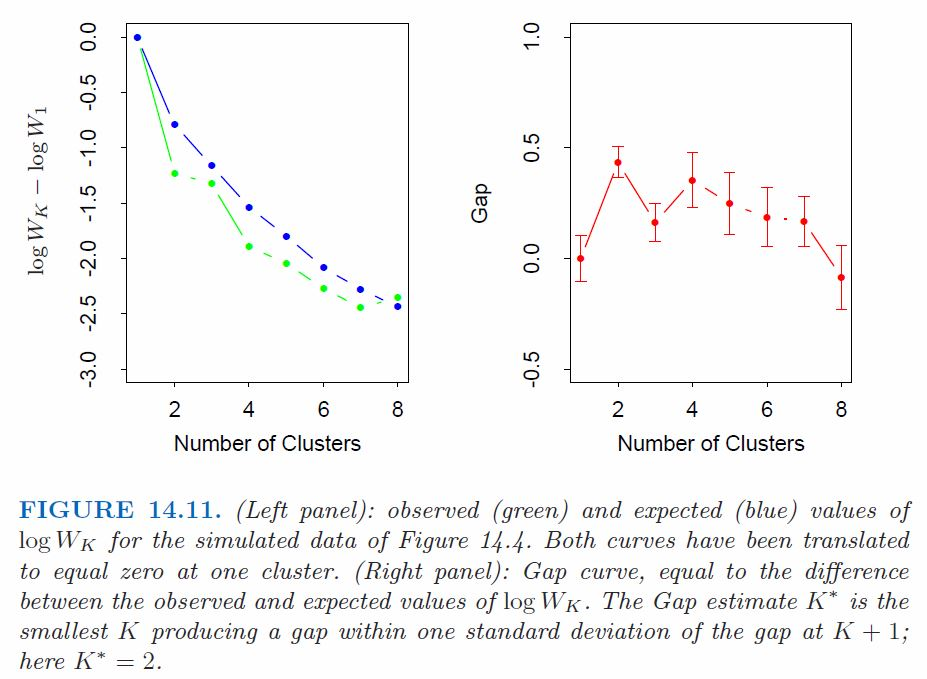

In [4]:
from IPython.display import Image
import os.path
path = r"C:\Users\Yixian\Documents\machine-learning"
file = "gap_statistic.JPG"
Image(filename = os.path.join(path, file))

## Use Cases

Note that K-Means can use for both supervised learning and unsurpervised learning

## Results Interpretation, Metrics and Visualization

The following is a visualization of the partitioning, also called **Voronoi tessellation**, i.e. subdivision into cells of space. 

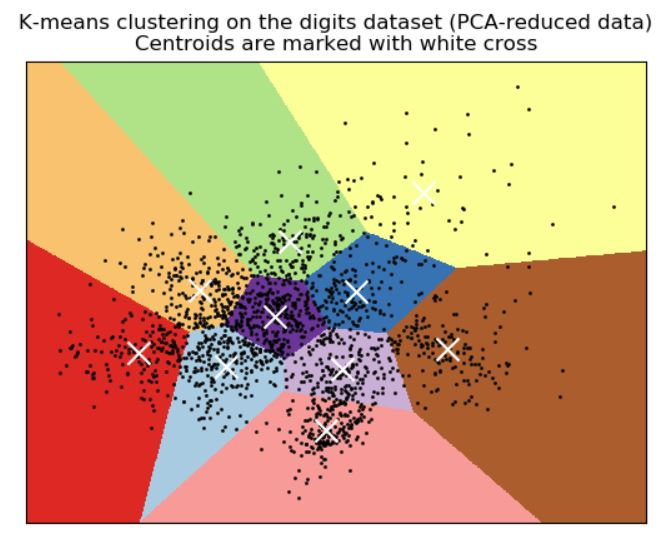

In [5]:
file = "voronoi_tessellation.JPG"
Image(filename = os.path.join(path, file))

## References

- ESL Sections 13.2, 14.3.6, 14.3.10, 14.3.11
- [scikit-learn Document 2.3.2](http://scikit-learn.org/stable/modules/clustering.html#k-means) 
- Data Science for Business, Chapter 6

### Further Reading

- “k-means++: The advantages of careful seeding” Arthur, David, and Sergei Vassilvitskii, Proceedings of the eighteenth annual ACM-SIAM symposium on Discrete algorithms, Society for Industrial and Applied Mathematics (2007)
- ["Using the Triangular Inequality to Accelerate K-means"](http://scholar.google.com/scholar_url?url=http://www.aaai.org/Papers/ICML/2003/ICML03-022.pdf&hl=en&sa=X&scisig=AAGBfm1nyQUGOGt9EZaFJjHbiSF3yegv8Q&nossl=1&oi=scholarr)

## Misc.